# Using sklearn for predicting house prices in California

Based on:
- https://www.kaggle.com/code/amritvirsinghx/step-by-step-ml-california-housing-prices/notebook
- https://www.kaggle.com/code/ilialar/california-housing-analysis-and-preciction#10.-Plotting-training-and-validation-curves

## Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
housing = pd.read_csv("../data/raw/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Explonatory Data Analysis

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


We can see that most columns has no nan values (except total_bedrooms), most features has float format, only 1 feature is categorical - ocean_proximity

In [5]:
housing[pd.isnull(housing).any(axis=1)].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


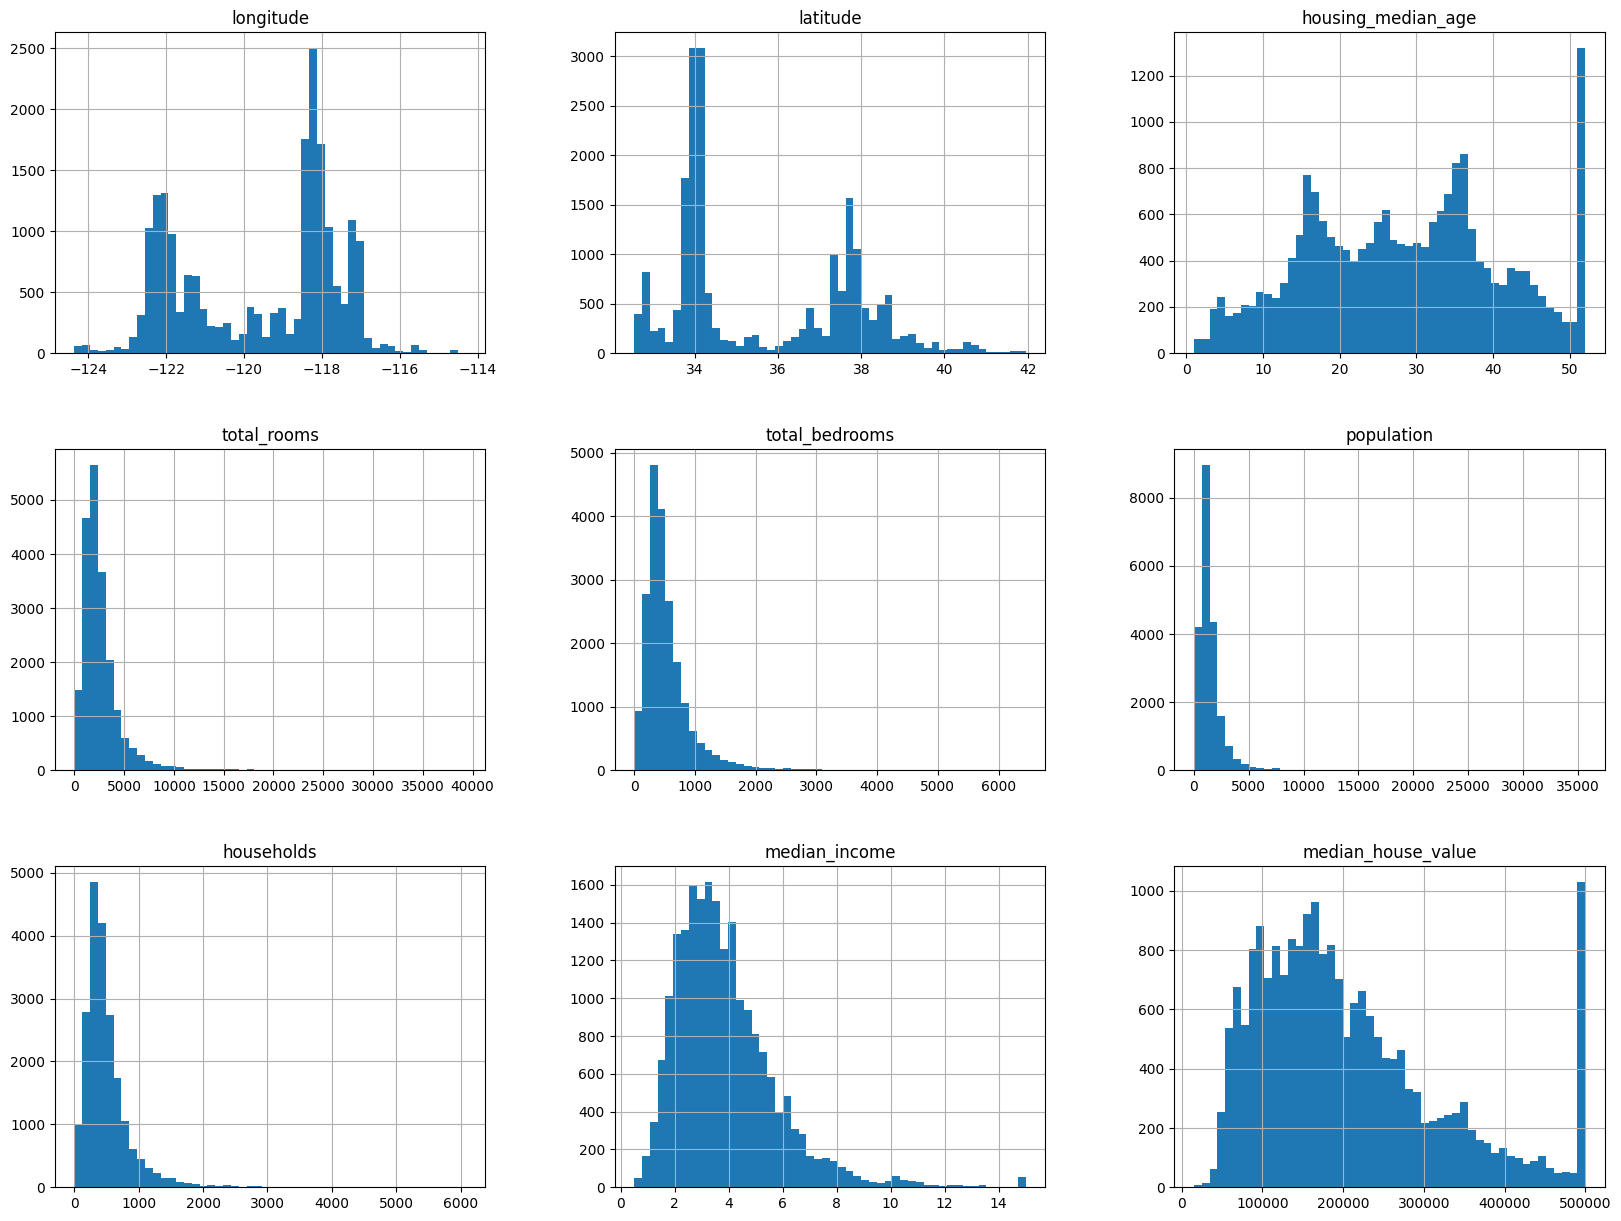

In [6]:
# creating plots on dataset
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?).

<Figure size 1000x1000 with 0 Axes>

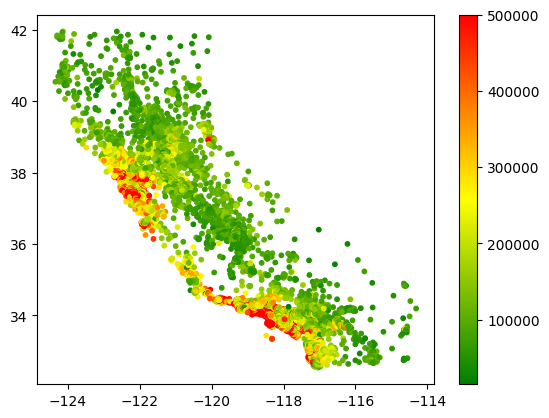

In [7]:
from matplotlib.colors import LinearSegmentedColormap

plt.figure(figsize=(10,10))

cmap = LinearSegmentedColormap.from_list(name='name', colors=['green','yellow','red'])

f, ax = plt.subplots()
points = ax.scatter(housing['longitude'], housing['latitude'], c=housing['median_house_value'],
                    s=10, cmap=cmap)
f.colorbar(points)

It seems that the average value of geographically nearest houses can be very good feature.

We can also see, that the most expensive houses are located near San Francisco (37.7749° N, 122.4194° W) and Los Angeles (34.0522° N, 118.2437°). Based on this we can use the distance to this cities as additional features.

We also see that the most expensive houses are on approximately on the straight line, and become cheaper when we moving to North-East. This means that the linear combination of coordinates themselves can be useful feature as well.

/tmp/ipykernel_4484/660915778.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_y = pd.DataFrame(housing).corr()


<AxesSubplot: >

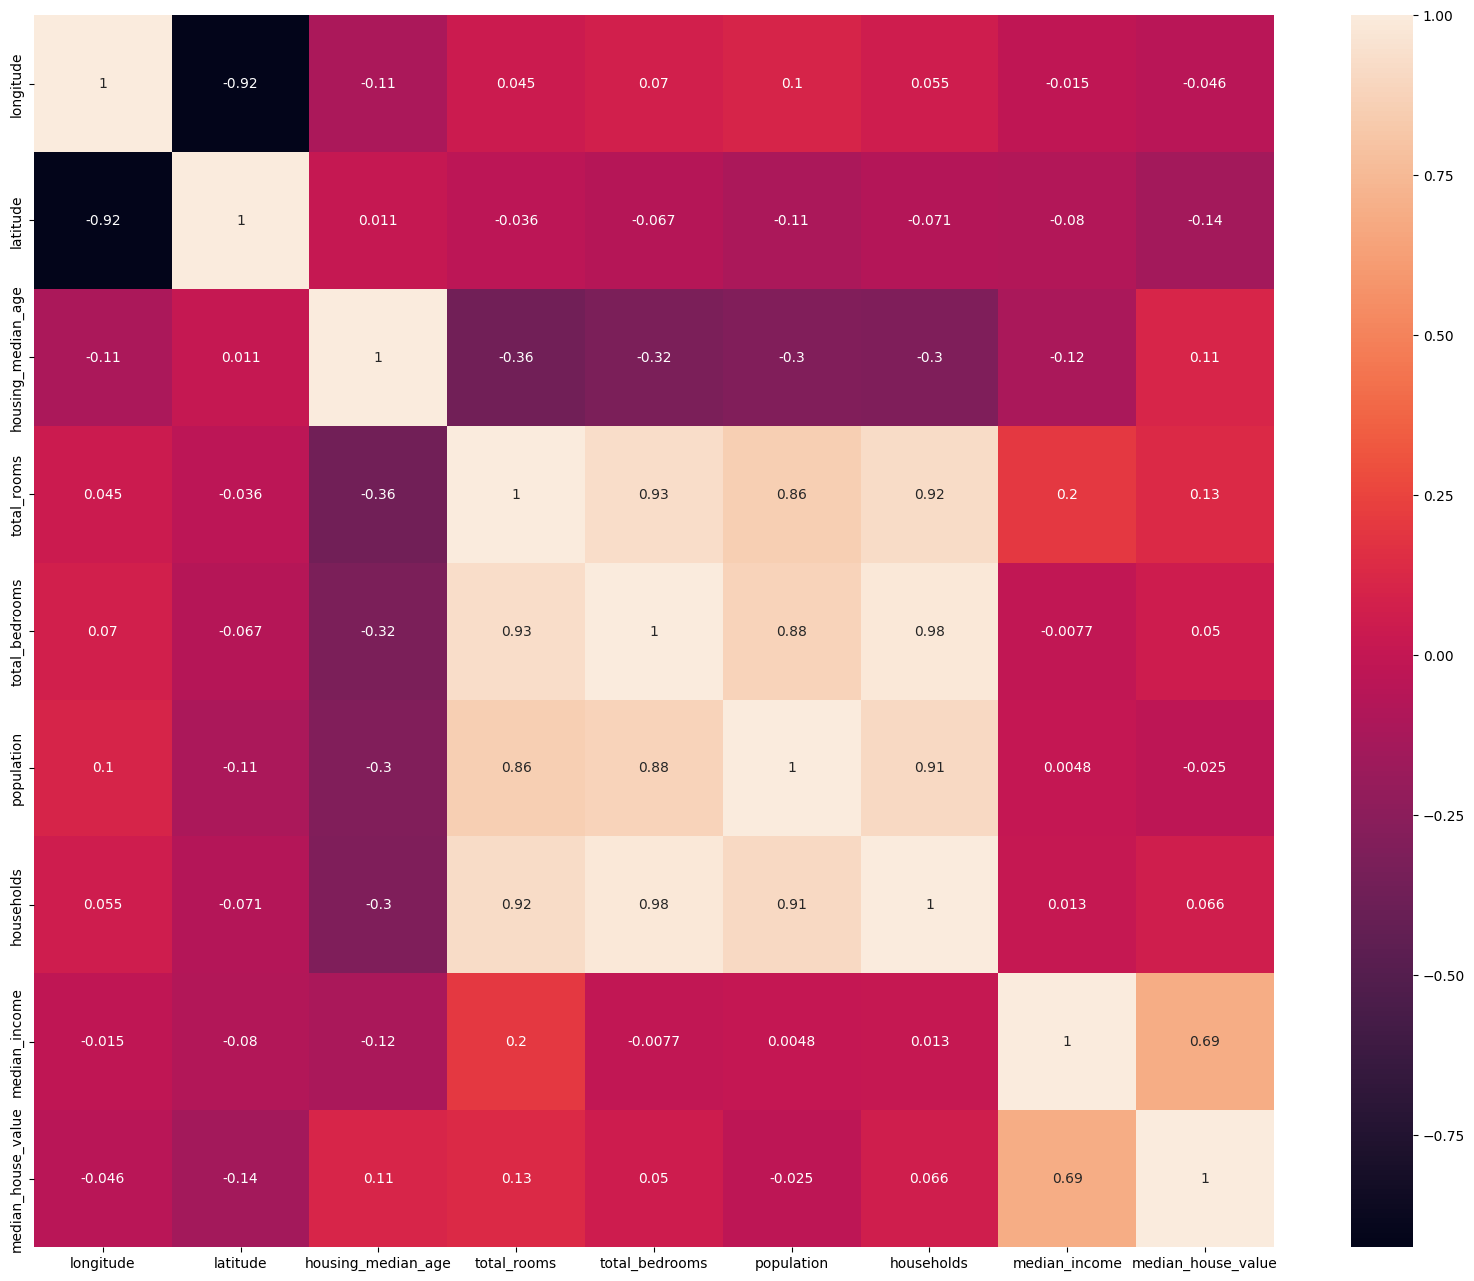

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_y = pd.DataFrame(housing).corr()
plt.rcParams['figure.figsize'] = (20, 16)  # Размер картинок
sns.heatmap(corr_y, 
            xticklabels=corr_y.columns.values,
            yticklabels=corr_y.columns.values, annot=True)

- House values are significantly correlated with median income
- Number of households is not 100% correlated with population, we can try to add average_size_of_household as a feature
- Longitude and Latitude should be analyzed separately (just a correlation with target variable is not very useful)
- There is a set of highly correlated features: number of rooms, bedrooms, population and households. It can be useful to reduce dimensionality of this subset, especially if we use linear models
- total_bedrooms is one of these highly correlated features, it means we can fill NaN values with high precision using simplest linear regression

In [9]:
value_count=housing['ocean_proximity'].value_counts()
value_count

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot: title={'center': 'House Value depending on Ocean Proximity'}, xlabel='ocean_proximity', ylabel='median_house_value'>

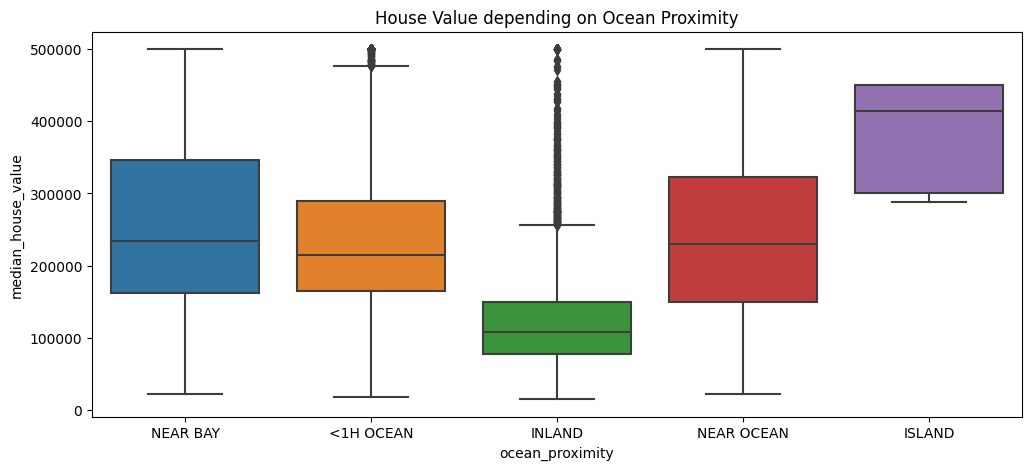

In [10]:
plt.figure(figsize=(12,5))
plt.title('House Value depending on Ocean Proximity')
sns.boxplot(x="ocean_proximity", y="median_house_value", data=housing)

We can see that INLAND houses has significantly lower prices. Distribution in other differ but not so much. There is no clear trend in house price / poximity, so we will not try to invent complex encoding approach. Let's just do OHE for this feature.